## Implemented using the RustBCA library

In [1]:
import sys
import os
print(os.getcwd())
os.chdir('C:\\Users\\ANINDIT\\RustBCA\\')

c:\Users\ANINDIT\Desktop\work done\term paper CP


In [11]:
import libRustBCA
print (libRustBCA.__file__)

c:\Users\ANINDIT\anaconda3\Lib\site-packages\libRustBCA.cp311-win_amd64.pyd


# Test-Runs

In [2]:
from scripts.materials import *
from scripts.formulas import *
from scripts.rustbca import *
from libRustBCA import *

energy = 1000.0 #eV
angle = 0.0 #degrees w.r.t. surface normal
num_samples = 1000

Y = sputtering_yield(hydrogen, tungsten, energy, angle, num_samples)
R_N, R_E = reflection_coefficient(hydrogen, tungsten, energy, angle, num_samples)
print(R_N, R_E)

0.494 0.2783858563247869


In [3]:
import libRustBCA
# Get all functions in the library
functions = [func for func in dir(libRustBCA) if callable(getattr(libRustBCA, func))]

# Print the list of functions
print(functions)

['compound_bca_list_1D_py', 'compound_bca_list_py', 'compound_reflection_coefficient', 'reflect_single_ion_py', 'reflection_coefficient', 'rotate_back_py', 'rotate_given_surface_normal_py', 'simple_bca_list_py', 'simple_bca_py', 'sputtering_yield']


Before rotation: (1.0, 0.0, 0.0)
After rotation: (0.7071067811865476, -0.7071067811865477, 0.0)
After rotation back: (1.0, 0.0, 0.0)
Sputtering yield for He on W at 2500.0 eV is 0.052 at/ion. Yamamura predicts 0.039 at/ion.
Particle reflection coefficient for He on W at 2500.0 eV is 0.441. Thomas predicts 0.414.
Energy reflection coefficient for He on W at 2500.0 eV is 0.24078107012404726
Particle reflection coefficient for He on HexW where x=0.1 at 2500.0 eV is 0.43. Thomas predicts 0.414.
Energy reflection coefficient for HexW where x=0.1 at 2500.0 eV is 0.2324222703355801
(vx, vy, vz) before reflection: (100000.0, 100000.0, 0.0)
(vx, vy, vz) after reflection: (0.0, 0.0, 0.0)
Running RustBCA for 10000 He ions on W at 1.0 keV...
This may take several minutes.
Simulation complete. Processing data...
Data processing complete.
RustBCA Y: 0.0279 Yamamura Y: 0.025479590898842535
RustBCA R: 0.5016 Thomas R: 0.4780755087527244
Time per ion: 0.8023979425430298 us/He
Running RustBCA for 10000 

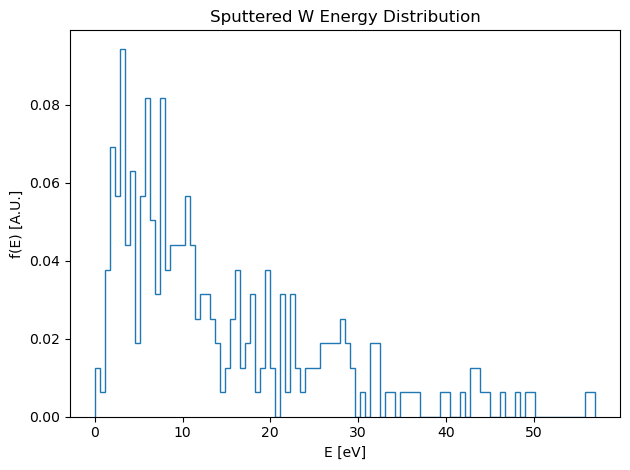

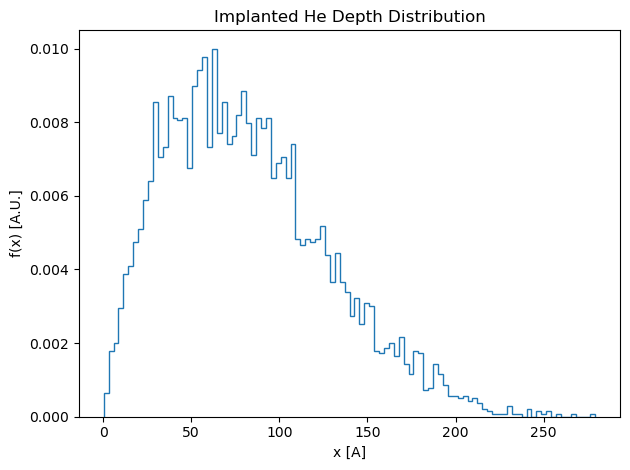

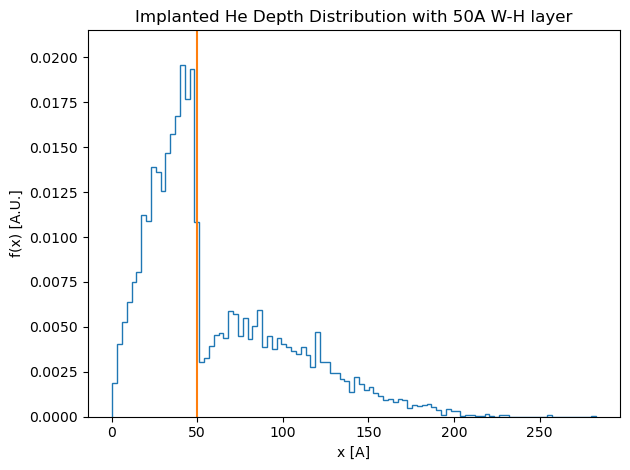

In [ ]:
%run C:/Users/ANINDIT/RustBCA/examples/tests/test_rustbca.py

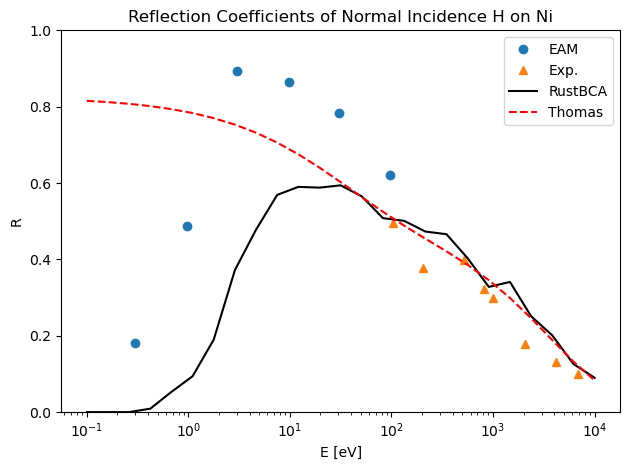

In [ ]:
%run C:/Users/ANINDIT/RustBCA/examples/tests/benchmark_eam.py

# Sputter Yield for Xe on Si

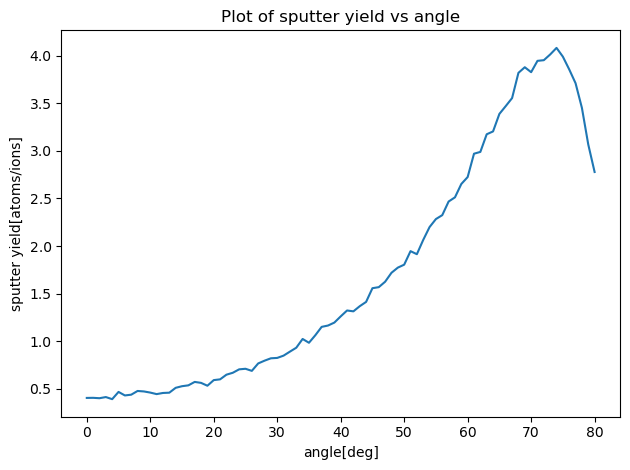

In [ ]:
import time

def yield_angle():

    #scripts/materials.py has a number of potential ions and targets
    ion = xenon
    ion['Eb'] = 0.0
    target = silicon

    #tungsten Eb = 0 is a 'worst-case' - accepted literature value is 3 eV
    target['Eb'] = 2.31

    energy = 1000 #eV
    angle = np.arange(81) #degrees
    num_samples = 1000
    
    Y = np.zeros(81)
    
    
    for i in range(0,81):
        Y[i] = sputtering_yield(ion, target, energy, angle[i], num_samples)
        
    return angle, Y
    

x, y = yield_angle()    
plt.plot(x, y)

# Add labels and title
plt.xlabel('angle[deg]')
plt.ylabel('sputter yield[atoms/ions]')
plt.title('Plot of sputter yield vs angle')

# Show the plot
plt.show()

In [ ]:
!cargo run --release C:\Users\ANINDIT\RustBCA\examples\layered_geometry.toml

In [ ]:
plot_distributions_rustbca('2000.0eV_0.0001deg_He_TiO2_Al_Si', helium, tungsten,
    incident_energy=2000, incident_angle=60,
    max_collision_contours=4, plot_2d_reflected_contours=True,
    collision_contour_significance_threshold=0.1, plot_garrison_contours=False,
    plot_reflected_energies_by_number_collisions=False,
    plot_scattering_energy_curve=False)

c:\Users\ANINDIT\anaconda3\envs\PYSRIM\lib\site-packages\numpy\lib\histograms.py:1067: RuntimeWarning: invalid value encountered in divide
  hist /= s


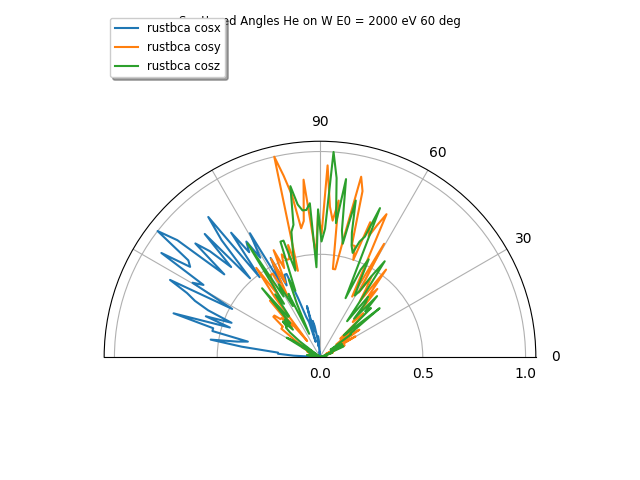

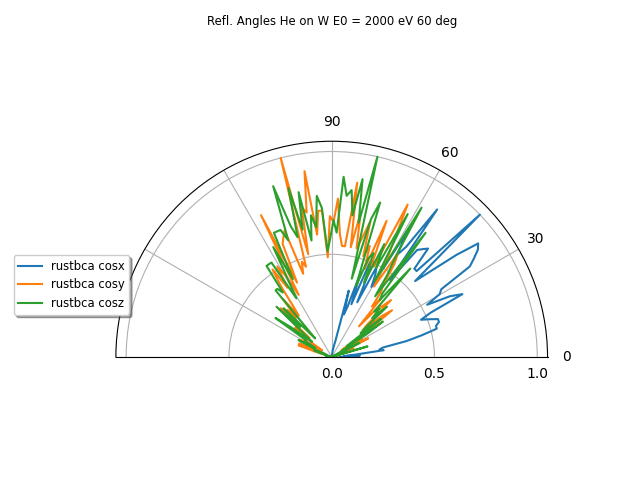

In [ ]:
from IPython.display import *
spt = Image(r'C:\Users\ANINDIT\RustBCA\scripts\test results\2000.0eV_0.0001deg_He_TiO2_Al_Sispt_ang.png')
ref = Image(r'C:\Users\ANINDIT\RustBCA\scripts\test results\2000.0eV_0.0001deg_He_TiO2_Al_Siref_ang.png')
display(spt,ref)

In [ ]:
def do_trajectory_plot(name, thickness=None, depth=None, boundary=None, plot_final_positions=True, plot_origins=True, show=True):
    '''
    Plots trajectories of ions and recoils from [name]trajectories.output.
    Optionally marks final positions/origins and draws material geometry.

    Geometry input is in same length_unit as the rustbca particles.

    Args:
        name (string): name of rustbca simulation
        thickness list(float): thickness of target, or None to not draw target
        depth list(float): depth of target, or None to not draw target
        boundary list((float, float)): points that make up boundary, or None to not draw boundary
        plot_final_positions (bool): mark final positions (reflected: X sputtered: * deposited ^)
        plot_origins (bool): mark originating locations of particles (o)
        show (bool): whether or not to show plots

    '''

    reflected = np.atleast_2d(np.genfromtxt(name+'reflected.output', delimiter=','))
    sputtered = np.atleast_2d(np.genfromtxt(name+'sputtered.output', delimiter=','))
    deposited = np.atleast_2d(np.genfromtxt(name+'deposited.output', delimiter=','))
    trajectories = np.atleast_2d(np.genfromtxt(name+'trajectories.output', delimiter=','))
    trajectory_data = np.atleast_1d(np.genfromtxt(name+'trajectory_data.output', delimiter=',').transpose().astype(int))

    x1arr = []
    y1arr = []

    if np.size(trajectories) > 0:
        min_Z = np.min(trajectories[:, 1])
        max_Z = np.max(trajectories[:, 1])
        colormap = cm.ScalarMappable(norm=colors.SymLogNorm( min_Z*4, vmin=min_Z, vmax=max_Z), cmap='tab20')

    fig1, axis1 = plt.subplots()

    index = 0
    x_max = 0


    if np.size(trajectories) > 0:
        for trajectory_length in trajectory_data:

            M = trajectories[index, 0]
            Z = trajectories[index, 1]
            E = trajectories[index:(trajectory_length + index), 2]
            x = trajectories[index:(trajectory_length + index), 3]
            y = trajectories[index:(trajectory_length + index), 4]
            z = trajectories[index:(trajectory_length + index), 5]

            if np.max(x) > x_max:
                x_max = np.max(x)

            if plot_origins: 
                # plt.scatter(x[0], y[0], color=colormap.to_rgba(Z), marker='.', s=5)
                x0, y0 = x[0], y[0]

            plt.plot(x, y, color = colormap.to_rgba(Z), linewidth = 1)
            x1arr.append(x)
            y1arr.append(y)

            index += trajectory_length

        

        if plot_final_positions:
            if np.size(sputtered) > 0:
                sputtered_colors = [colormap.to_rgba(Z) for Z in sputtered[:,1]]
                # plt.scatter(sputtered[:,3], sputtered[:,4], s=50, color=sputtered_colors, marker='*')
                x_spt, y_spt = sputtered[:,3], sputtered[:,4]

            if np.size(reflected) > 0:
                reflected_colors = [colormap.to_rgba(Z) for Z in reflected[:,1]]
                # plt.scatter(reflected[:,3], reflected[:,4], s=50, color=reflected_colors, marker='x')
                x_ref, y_ref = reflected[:,3], reflected[:,4]

            if np.size(deposited) > 0:
                deposited_colors = [colormap.to_rgba(Z) for Z in deposited[:,1]]
                # plt.scatter(deposited[:,2], deposited[:,3], s=50, color=deposited_colors, marker='^')
                x_dep, y_dep = deposited[:,2], deposited[:,3]

        if thickness and depth:
            x_box = [0., 0., depth, depth, 0.]
            y_box = [-1*thickness/2., thickness/2., thickness/2., -1*thickness/2., -1*thickness/2.]
            # Set the coordinates for the zoomed-in area
#             plt.plot(x_box, y_box, color='dimgray', linewidth=3)
            
        elif boundary:
            x = [x_ for (x_, y_) in boundary]
            y = [y_ for (x_, y_) in boundary]
            x.append(x[0])
            y.append(y[0])
#             plt.plot(x, y, linewidth=3, color="dimgray")
            return x, y, x0, y0, x1arr, y1arr, x_spt, y_spt, x_ref, y_ref, x_dep, y_dep, Z

    return x_box, y_box, x0, y0, x1arr, y1arr, x_spt, y_spt, x_ref, y_ref, x_dep, y_dep, Z, trajectories
    
#         plt.xlabel('x [um]')
#         plt.ylabel('y [um]')
#         plt.title(name+' Trajectories')
#         plt.axis('square')
#         plt.savefig(name+'trajectories.png')
#         plt.show()
#         plt.close()

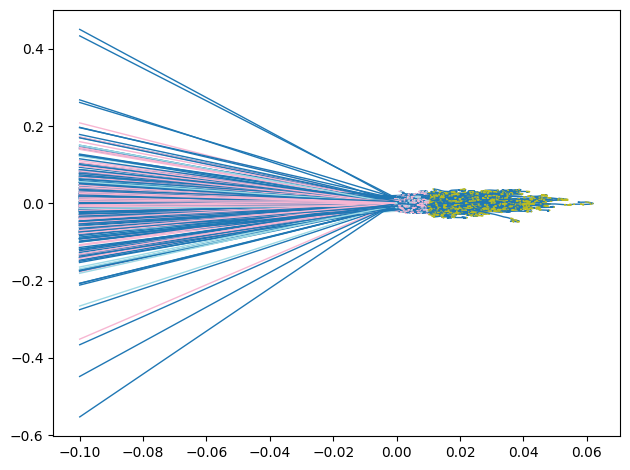

In [ ]:
os.chdir('C:\\Users\\ANINDIT\\RustBCA\\scripts')
x, y, x0, y0, x1arr, y1arr, x_spt, y_spt, x_ref, y_ref, x_dep, y_dep, Z, trajectories = do_trajectory_plot('2000.0eV_0.0001deg_He_TiO2_Al_Si',
                   thickness=0.08, 
                   depth=0.08, 
                   boundary= None,
                   plot_final_positions=True, plot_origins=True, show=True)

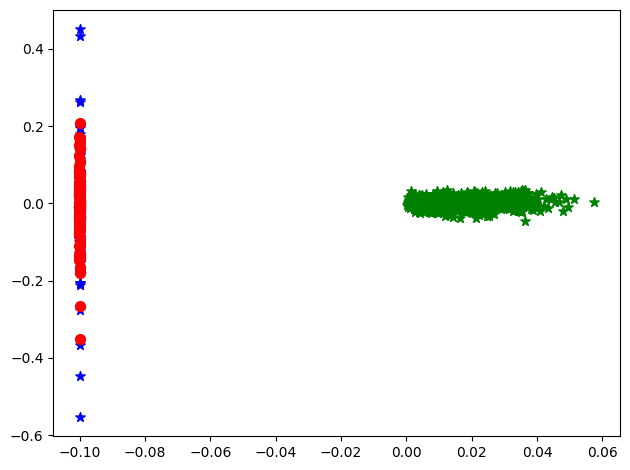

In [ ]:
if np.size(trajectories) > 0:
        min_Z = np.min(trajectories[:, 1])
        max_Z = np.max(trajectories[:, 1])
        colormap = cm.ScalarMappable(norm=colors.SymLogNorm( min_Z*4, vmin=min_Z, vmax=max_Z), cmap='tab20')
plt.scatter(x_ref, y_ref, s=50, color='b', marker='*')
plt.scatter(x_spt, y_spt, s=50, color='r', marker='o')
plt.scatter(x_dep, y_dep, s=50, color='g', marker='*')


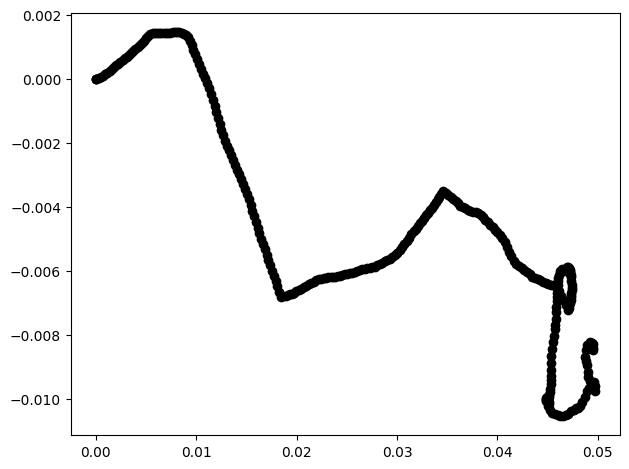

In [ ]:
plt.scatter(x1arr[0], y1arr[0], color='black', linewidth = 1)

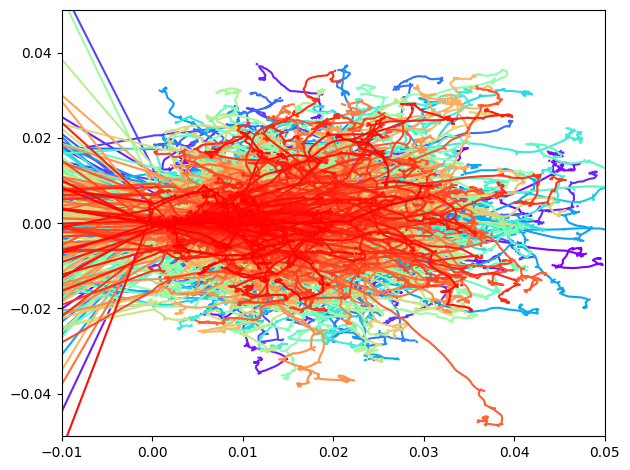

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_points(x, y):
    n = len(x)
    colors = plt.cm.rainbow(np.linspace(0, 1, n))
    for i in range(n):
        plt.plot(x[i], y[i], color=colors[i])

# Example usage
x = np.array([[1, 2, 3], [4, 5, 6]])
y = np.array([[10, 20, 30], [40, 50, 60]])
plot_points(x1arr, y1arr)
plt.xlim(-0.01,0.05)
plt.ylim(-0.05,0.06)
plt.show()